# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis

* Formerly 046193 

#### Tal Daniel

## Tutorial 01 - Classical Methods in Statistical Inference - Point Estimation

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Point Estimation
* Evaluating Estimators
    * Bias-Variance of Estimators
* Maximum Likelihood Estimator (MLE)
    * KL Divergence and Asymptotic Consequences


In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## <img src="https://img.icons8.com/doodle/48/000000/statistics.png" style="height:50px;display:inline"> Statistical Inference - Classical Methods
* **Statistical Inference** - a collection of methods and tools to draw conclusions from data that are usually affected by randomness.
    * General Setup - there is an unknown quantity that we wish to estimate by observing given data. There are 2 approaches:
        * Classical Inference (**Frequentist**) - the unknown quantity $\theta$ is deterministic. We estimate non-random quantities.
        * Bayesian Inference - we assume the unknown quantity $\theta$ is a random variable and we make assumptions on the type of distribution. After observing the data, we can update the distribution using Bayes' rule.  We estimate random variables.
* Examples:
    * Predicting the results of an election - we cannot possibly poll the entire population, thus, we pick a random sample from the population to get "where the wind blows". Here, the randomness come from the sampling process. Another source of randomness may be the time frame in which the poll was conducted (one month or one week before the elections).
        * In the classical approach: $\theta$ is the percentage of people that vote for candidate A. After polling $n$ randomly chosen voters, where $n_A$ voters said they would vote for candidate A, we may estimate $\theta$ by: $$ \hat{\theta} = \frac{n_A}{n} $$
            * Notice that $\hat{\theta}$ is a **random variable** as it depends on the *random* sample. 
    * Receiver-Transimitter - the receiver may get a corrupted version of messages due to random noise.
        * In the Bayesian approach, $\theta \sim Bernoulli(p)$ is the transimitted bit ({0,1}), where $p$ is the proabibility to transmit 1. The receiver has to recover $\theta$ based on the knowledge of the distribution.

### <img src="https://img.icons8.com/cotton/64/000000/pickup-point.png" style="height:50px;display:inline"> Point Estimation
* **Assumption** - $\theta$ is fixed, non-random, quantity.
    * Example: $\theta$ can be the expected value of a random variable $\theta = \mathbb{E}[x]$
* The data - a random sample $\{X_i\}_{i=1}^n$ such that $X_i$'s have the **same distribution** as $X$.
* The point estimator - a function of the random sample: $$ \hat{\theta} = h(X_1, X_2, ..., X_n) $$
    * Note: the estimator may depend *stochastically* on the data, but we will assume the dependence is deterministic.
    * Example: if $\theta = \mathbb{E}[x]$ then we may choose $\hat{\theta}$ to be: $$ \hat{\theta} = \overline{X} = \frac{X_1 + X_2 + ... + X_n}{n} $$
        * Note: this not always the 'best' estimator for the mean
* There are many possible estimators for $\theta$, so how can we make sure we have chosen a good estimator? We need to define ways to evaluate our estimators.

#### <img src="https://img.icons8.com/cotton/64/000000/rating.png" style="height:30px;display:inline"> Evaluating Estimators
* **<a style="color:red"> Bias </a>** - the bias of an estimator $B(\hat{\theta})$ is a measure of how far is the estimator $\hat{\theta}$ from the real $\theta$ **on average**. Formal definition: $$ B(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta $$
    * Note that the bias cannot be actually computed (why is that?).
    * Recall that $\hat{\theta}$ is a **random variable**.
    * **Unbiased** estimator - we would like the bias to be close to 0, which indicates that on average $\hat{\theta}$ is close to $\theta$. $\hat{\theta}$ is an *unbiased* estimator of $\theta$ if: $B(\hat{\theta}) = 0 \rightarrow \mathbb{E}[\hat{\theta}] = \theta$
    
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Bias of an Estimator
Let $X_1, X_2, ..., X_n$ be a random sample. Assume (always) that the samples are independent and identically distributed (iid).
1. Show that the sample mean: $\hat{\theta}$ to be: $ \hat{\theta} = \overline{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ is an *unbiased* estimator of $\theta=\mathbb{E}[X_i]$
2. If we choose $ \hat{\theta}_1 = X_1 $, is the the estimator unbiased? Is it a good estimator?

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution

1. $B(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta = \mathbb{E}[\overline{X}] - \theta =\mathbb{E}[X_i] - \theta = 0 $
2. If we choose $ \hat{\theta}_1 = X_1 $ then $ B(\hat{\theta}_1) = \mathbb{E}[\hat{\theta}_1] - \theta = \mathbb{E}[X_1] - \theta = 0$. This is an *unbiased* estimation! But is it good, or is it as good as $\hat{\theta} = \overline{X}$? Not necessarily, as there can be many samples with different values.


* **<a style="color:red"> MSE </a>** (Mean Squared Error) - the MSE of an estimator: $$ MSE(\hat{\theta}) = \mathbb{E}\big[(\hat{\theta} - \theta)^2 \big] $$
    * Note that the expression $\hat{\theta} - \theta$ is the *error* we make by estimating $\theta$ with $\hat{\theta}$.
    * The MSE is a measure of the expected (squared) error. **Smaller** MSE is generally an indication of a better estimator.
    * We define the **variance** of the estimator as follows: $Var(\hat{\theta}) = \mathbb{E}\big[(\mathbb{E}[\hat{\theta}] - \hat{\theta})^2 \big]$
    * It holds: (HW) $$ MSE(\hat{\theta}) = Var(\hat{\theta}) + Bias^2(\hat{\theta}) $$
    
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - MSE of an Estimator
Let $X_1, X_2, ..., X_n$ be a random sample with mean $\mathbb{E}[X_i] = \theta$ and variance $Var(X_i) = \sigma^2$
 and consider the following estimators:
 1. $\hat{\theta}_1 = X_1$
 2. $\hat{\theta}_2 = \overline{X} = \frac{X_1 + X_2 + ... + X_n}{n}$
 
Find $MSE(\hat{\theta}_1), MSE(\hat{\theta}_2)$ and show that for $n>1$ we have $MSE(\hat{\theta}_1) > MSE(\hat{\theta}_2)$.

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution

$$ MSE(\hat{\theta}_1) = \mathbb{E}\big[(\hat{\theta}_1 - \theta)^2 \big] = \mathbb{E}\big[(X_1 - \mathbb{E}[X_1])^2 \big] = Var(X_1) = \sigma^2 $$ 

* We use the following:
    * $\mathbb{E}[X^2] = Var(X) + (\mathbb{E}[X])^2 $
    * For a constant $b$: $Var(X + b) = Var(X)$
    * $\mathbb{E}[\overline{X} - \theta] = \frac{n\mathbb{E}[X_i]}{n} - \mathbb{E}[X_i] = 0$
    * $Var[\overline{X}] = Var[\frac{1}{n}\sum_{i=1}^nX_i] = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n}$
        * Recall that the samples are i.i.d., and the variance of the sum of i.i.d. samples is the sum of the variances.

$$ MSE(\hat{\theta}_2) = \mathbb{E}\big[(\hat{\theta}_2 - \theta)^2 \big] = \mathbb{E}\big[(\overline{X} - \theta)^2 \big] = Var(\overline{X} - \theta) + (\mathbb{E}[\overline{X} - \theta])^2 = Var(\overline{X}) + 0 = \frac{n\sigma^2}{n^2} = \frac{\sigma^2}{n}$$ 
        

Thus, for $n>1$: $MSE(\hat{\theta}_1) > MSE(\hat{\theta}_2) $, which means that $\overline{X}$ is a better estimator.

* **<a style="color:red"> Consistency </a>** - an estimator is consistent if as the sample size $n$ grows, then $\hat{\theta}$ converges to the real value of $\theta$.
    * Formally: Let $\hat{\theta}_1, \hat{\theta}_2, ..., \hat{\theta}_n$ be a sequence of point estimators of $\theta$. We say that $\hat{\theta}_n$ is a **consistent** estimator of $\theta$, if: $$ \lim_{n \to \infty} P(|\hat{\theta}_n - \theta| \geq \epsilon) = 0, \forall \epsilon >0 $$
    * Note: other convergence types yield different definitions of consistency
    
#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Consistency of an Estimator
Let $X_1, X_2, ..., X_n$ be a random sample with mean $\mathbb{E}[X_i] = \theta$ and variance $Var(X_i) = \sigma^2$.

Show that $\hat{\theta}_n = \overline{X}$ is a *consistent* estimator of $\theta$.

Reminder:
* **Chebyshev's inequality**: let $\mu = \mathbb{E}[X], \sigma^2= Var[X]$. Then: $ P(|X- \mu| > t) \leq \frac{\sigma^2}{t^2}$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution

$$ P(|\hat{\theta}_n - \theta| \geq \epsilon) = P(|\overline{X} - \theta| \geq \epsilon) $$

* Using **Chebyshev's inequality** and recall that $\overline{X}$ is a random variable with **mean** $\theta$:

$$ \rightarrow P(|\overline{X} - \theta| \geq \epsilon) \leq \frac{Var[{\overline{X}]}}{\epsilon^2} = \frac{\sigma^2}{n} \cdot \frac{1}{\epsilon^2} $$
$$ \rightarrow \lim_{n \to \infty} \frac{\sigma^2}{n} \cdot \frac{1}{\epsilon^2} = 0$$

### <img src="https://img.icons8.com/cute-clipart/64/000000/75-percents.png" style="height:50px;display:inline"> Point Estimation of Mean and Variance 
The sample mean, $\overline{X}$, is often a reasonable point estimator for the mean. But what about the variance? Before we assumed the the variance was known, but when we want to estimate it, we need to take a similar approach.

By definition, the variance of a distribution $\sigma^2$ is: $$ \sigma^2 = \mathbb{E}[(X - \mu)^2] $$.
* If we define the following *random variable*: $Y = (X -\mu)^2$ then the number $\sigma^2$ is the mean of that variable, that is $\sigma^2 = \mathbb{E}[Y]$.
* But wait, if $\sigma^2$ is the mean of $Y$, we have already derived a point estimator for the mean! $$ \hat{\sigma}^2 = \hat{Y} = \frac{1}{n}\sum_{i=1}^nY_i = \frac{1}{n}\sum_{i=1}^n (X_i -\mu)^2 $$
    * By the **linearity** of the expectation, this is an **unbiased** estimator of the variance.
    * From the **weak law of large numbers** this is also a **consistent** estimator of the variance.
* The problem? What if do not know the value of $\mu$? It is often reasonable to replace $\mu$ with our point estimate of $\mu$, which transforms the estimate for $\sigma^2$ to: $$ \overline{S}^2 = \frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2 =... =\frac{1}{n}\big( \sum_{i=1}^nX_i^2 -n\overline{X}^2\big)  $$

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Bias of the Variance Estimator
Let $X_1, X_2, ..., X_n$ be a random sample with mean $\mathbb{E}[X_i] = \mu$ and variance $Var(X_i) = \sigma^2$.

Suppose that we use: $$ \overline{S}^2 = \frac{1}{n}\big( \sum_{i=1}^nX_i^2 -n\overline{X}^2\big) $$ as our estimate for $\sigma^2$. Find the bias of the estimator: $$ B[\overline{S}^2] = \mathbb{E}[\overline{S}^2] -\sigma^2 $$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
* $\mathbb{E}[\overline{X}^2] = (\mathbb{E}[\overline{X}])^2 + Var(\overline{X}) = \mu^2 +\frac{\sigma^2}{n}$
$$ \mathbb{E}[\overline{S}^2] = \frac{1}{n}\big(\sum_{i=1}^n\mathbb{E}[X_i^2] -n \mathbb{E}[\overline{X}^2] \big) $$ $$ =\frac{1}{n} \big( n(\mu^2 +\sigma^2) -n(\mu +\frac{\sigma^2}{n})\big) = \frac{n-1}{n} \sigma^2 $$ $$ \rightarrow B[\overline{S}^2] = \mathbb{E}[\overline{S}^2] -\sigma^2 = -\frac{\sigma^2}{n} $$

Thus, $ \overline{S}^2$ is a **biased estimator** of the variance!
* If $n$ is very *large*, then the bias is very **small**.
* How can we obtain an **unbiased estimator** of the variance?
    * By simply multiplying $\overline{S}^2$ by $\frac{n}{n-1}$.

In conclusion, we define the *unbiased* estimator of the variance, called the **sample variance** to be: $$ S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2 =... =\frac{1}{n-1}\big( \sum_{i=1}^nX_i^2 -n\overline{X}^2\big) $$
* The **sample standard deviation** is $S = \sqrt{S^2}$, which is an **unbiased estimator** of the standard deviation.
* Note: a good estimator should be **asymptotically unbiased**. In many cases, for a finite sample, a biased estimator is *better* than an unbiased one! (recall overfitting from ML?). There is nothing special in the lack of bias, *except* asymptotically.

### <img src="https://img.icons8.com/ultraviolet/80/000000/tail-of-whale.png" style="height:50px;display:inline">Non-Parametric Point Estimation Using The Tail Sum Formula
* Every random variable with possible values $\{0,1,...,n\}$ is a **counting variable** representing number of events that occur in some list of $n$ events $A_1,..., A_n$.
* To see this, let $A_j$ be the event that $(X \geq j)$. If $X=x$ for $0 \leq x \leq n$, then $A_j$ occurs for $1 \leq j \leq x$ and $A_j$ **does not** occur for $x<j\leq n$. So if $X =x$, the number of events $A_j$ that occur is exactly $x$.
* The resulting formula for $\mathbb{E}[X]$ - **The Tail Sum Formula for Expectation**: $$ \text{For } X \text{ with possible values } \{0,1...,n\}, $$ $$ \mathbb{E}[X] = \sum_{j=1}^n P(X\geq j) $$
* Proof outline:
    * Define $p_j = P(X=j)$.
    * The expectation $\mathbb{E}[X] = 1p_1 + 2p_2 + 3p_3 +... + np_n$ is the following sum: $$ p_1 $$ $$ +p_2 +p_2 $$ $$ +p_3 +p_3 + p_3 $$ $$ +...+... +... $$ $$ +p_n +p_n +... +p_n $$
    * By the addition rule of probabilities, and the assumption that the only possible values of $X$ are $\{0,1,...,n\}$, the sum of the first column of $p$ is $P(X\geq1)$, the sum of the second solumn is $P(X\geq 2)$ and so on. The sum of the $j^{th}$ column is $P(X\geq j), 1 \leq j \leq n$. The whole sum is the sum of the column sums: $$ \sum_{j=1}^n P(X\geq j) $$

### <img src="https://img.icons8.com/dusk/64/000000/maximum-value.png" style="height:50px;display:inline"> Maximum Likelihood Estimation (MLE)
* The MLE is an estimator that picks the best parameters by maximizing the **likelihood** of the distribution. Recall that when we developed Bayes rule, the likelihood is $p(D|\theta)$ (which is a function of $\theta$).
* Definition: $$\hat{\theta}_{MLE} = \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} p(D|\theta) =  \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \log p(D|\theta)$$
    * The last equality is true since the log function is monotonically increasing. Therefore if a function $f(x) \geq 0$, achieves a maximum at $x_1$, then $\log⁡(f(x))$ also achieves a maximum at $x_1$
 
* We assume the variables are **I.I.D (independent identically distributed)**. Note that these are the samples.
* $L(\theta) = p(D|\theta) = p(x_1, x_2, ..., x_n|\theta) = \prod_{k=1}^n p(x_k|\theta)$
* $l(\theta) = \log \big(L(\theta)\big) = \sum_{k=1}^{n} \log p(x_k|\theta)$
    * $\log(x * y * z) = \log x + \log y + \log z$
* $\rightarrow \hat{\theta}_{MLE} =  \underset{\theta \in \mathcal{R}^{p}}{\mathrm{argmax}} \{ l(\theta)\}$

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:50px;display:inline"> Exercise  - MLE for Univariate Gaussian
Given $\{x_i\}_{i=1}^n$ i.i.d samples of $X \sim N(\mu, \sigma^2)$, what is the MLE?

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
The first thing to ask yourself is, **what are the parameters** in this problem? In our case, the parametrs are $\theta = [\mu, \sigma^2]$, it is just a matter of notation.

* $p(x_i) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{1}{2} \frac{(x_i - \mu)^2}{\sigma^2}}$
* $L(\theta) = L(\mu, \sigma^2) = p(x_1, x_2, ..., x_n |\mu, \sigma^2) = \prod_{i=1}^n p(x_i|\theta) = \frac{1}{(2\pi \sigma^2)^{\frac{n}{2}}} e^{\frac{-1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2}$
* $l(\theta) = \log L(\theta) = -n (\log \pi + \frac{1}{2} \log \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (x_i - \mu)^2$

#### Find the optimal $\theta$
As usual, find the point where the deriviative w.r.t $\theta$ is 0
* $\frac{\partial l}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^n (x_i - \mu) = 0 \rightarrow \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$
* $\frac{\partial l}{\partial \sigma^2} = - \frac{n}{2 \sigma^2} + \frac{1}{\sigma^4}\sum_{i=1}^n (x_i - \mu)^2 = 0 $
    * Plug in $\mu = \hat{\mu}_{MLE} \rightarrow \hat{\sigma^2}_{MLE} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu}_{MLE})^2 $
* Summary: $$ \hat{\mu}_{MLE} = \frac{1}{n} \sum_{i=1}^n x_i$$ $$\hat{\sigma^2}_{MLE} = \frac{1}{n}\sum_{i=1}^n (x_i - \hat{\mu}_{MLE})^2 $$

* Do these look familiar? These are the **empirical** mean and variance!

mu mle:  5.340300917859494
var mle:  38.21984387083833


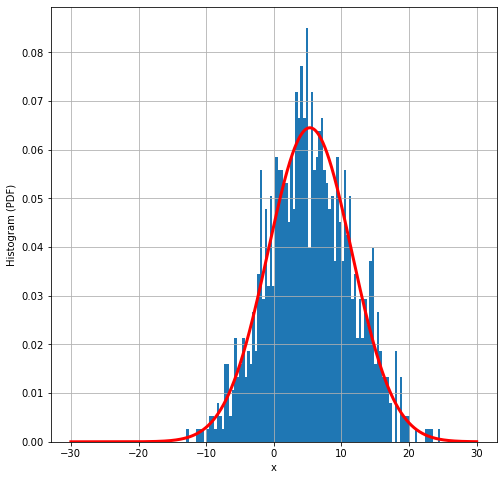

In [3]:
# let's see how the MLE performs
mu_real = 5
var_real = 36
num_samples= 1000
samples = np.random.normal(mu_real, np.sqrt(var_real), size=(num_samples))

mu_mle = np.sum(samples) / num_samples
var_mle = np.sum(np.square(samples - mu_mle)) / num_samples

print("mu mle: ", mu_mle)
print("var mle: ", var_mle)

x = np.linspace(-30, 30, 10000)
f_x_mle = (1 / np.sqrt(2 * np.pi * var_mle)) * np.exp(-0.5 * (np.square(x - mu_mle)) / var_mle)

# set bins for histogram
n_bins = 100
bins_edges = np.linspace(samples.min(), samples.max() + 1e-9, n_bins + 1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_ylabel('Histogram (PDF)')
ax.set_xlabel('x')

# plot histogram
ax.hist(samples, bins=bins_edges, density=True)
# plot estimation
ax.plot(x, f_x_mle, linewidth=3, color='red')

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - MLE for m-Dimensional Gaussian
Given $\{x_i\}_{i=1}^n$ i.i.d samples of $X \sim N(\mu, \Sigma)$, what is the MLE?

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
The final results are pretty much the same, but with vectors and matrices, though the math is a little more complicated.
$$ \hat{\overline{\mu}}_{MLE} = \frac{1}{n} \sum_{i=1}^n \overline{x_i} $$
$$ \hat{\Sigma}_{MLE} = \frac{1}{n} \sum_{i=1}^n (\overline{x_i} - \hat{\overline{\mu}}_{MLE}) (\overline{x_i} - \hat{\overline{\mu}}_{MLE})^{T}$$

#### <img src="https://img.icons8.com/dusk/64/000000/scissors.png" style="height:30px;display:inline"> Vector & Matrix Deriviatives
* $\nabla_x Ax = A^{T}$
* $\nabla_x x^{T} A x = (A + A^{T}) x$ 
* $\frac{\partial}{\partial A} \ln |A| = A^{-T}$
* $\frac{\partial}{\partial A} Tr[AB] = B^{T}$

Using the above, we will use the following:
1. $\nabla_{\mu} {\mu}^{T} \Sigma^{-1} x_i = \Sigma^{-1} x_i$ 
2. $\nabla_{\mu} {\mu}^{T} \Sigma^{-1} \mu = (\Sigma^{-1} + {\Sigma}^{-T}) \mu$
3. $\frac{\partial}{\partial \Sigma^{-1}} \ln |\Sigma^{-1}| = \Sigma^{T} = \Sigma$
4. $\frac{\partial}{\partial \Sigma^{-1}} Tr[\Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T}] = \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T}$

#### Solve for the d-dimensional case
* $p(x|\mu, \Sigma) = \frac{1}{(2\pi)^{\frac{nd}{2}} |\Sigma|^{\frac{n}{2}}} e^{- \frac{1}{2}\sum_{i=1}^n (x_i - \mu)^{T} \Sigma^{-1} (x_i - \mu)}$
* $\ln p(x|\mu, \Sigma) \propto -\frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) $
* $\nabla_{\mu} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) = \sum_{i=1}^{n} (-2\Sigma^{-1} \overline{x_i} + (\Sigma^{-1} + {\Sigma}^{-T}) \mu) = 0 $ $$ \rightarrow \hat{\overline{\mu}}_{MLE} = \frac{1}{n} \sum_{i=1}^n \overline{x_i} $$

* **The Trace Trick** - $\sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) = \sum_{i=1}^n \textit{Trace}\big((\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu})\big) = \textit{Trace}\big(\Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T} \big)$
* $\frac{\partial}{\partial \Sigma^{-1}}\big( \frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu})^{T} \Sigma^{-1} (\overline{x_i} - \overline{\mu}) \big) = \frac{\partial}{\partial \Sigma^{-1}}\big( \frac{n}{2} \ln |\Sigma^{-1}| -\frac{1}{2} Tr[\Sigma^{-1} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T}] \big) = $ $$ \frac{n}{2} \Sigma - \frac{1}{2} \sum_{i=1}^n (\overline{x_i} - \overline{\mu}) (\overline{x_i} - \overline{\mu})^{T} = 0 $$ $$ \rightarrow \hat{\Sigma}_{MLE} = \frac{1}{n} \sum_{i=1}^n (\overline{x_i} - \hat{\overline{\mu}}_{MLE}) (\overline{x_i} - \hat{\overline{\mu}}_{MLE})^{T} $$


### <img src="https://img.icons8.com/dusk/64/000000/infinity.png" style="height:50px;display:inline"> Asymptotic Properties of MLEs
Let $X_1, X_2, ..., X_n$ be a random sample from a distribution with a parameter $\theta$. Let $\hat{\theta}_{ML}$ denote the MLE of $\theta$. Then (under some conditions):

1.  $\hat{\theta}_{ML}$ is **asymptotaically consistent**: $$ \lim_{n \to \infty} P(|\hat{\theta}_{ML} - \theta| \geq \epsilon) = 0, \forall \epsilon >0 $$
2. $\hat{\theta}_{ML}$ is **asymptotaically unbiased**: $$ \lim_{n \to \infty} \mathbb{E}[\hat{\theta}_{ML}] = \theta $$
3. As $n$ becomes large, $\hat{\theta}_{ML}$ is approximately a **normal random variable**, that is, the random variable: $$ \frac{\hat{\theta}_{ML} - \theta}{\sqrt{Var(\hat{\theta}_{ML})}} $$ **convereges in distribution** to $\mathcal{N}(0,1) $

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Asymptotic Consequences of MLE When Choosing The Wrong Model
Definitions:
* **Kullback-Leibler (KL) Divergence** - defined to be $$ KL(p(x)||q(x)) = \underset{x \sim p(x)}{\mathbb{E}}[\log \frac{p(x)}{q(x)}]$$, it is a way to measure "distance between distribution" (how far is $q(x)$ from $p(x)$.
* **Entropy** - defined to be $$ H(p(X)) = -\underset{x \sim p(x)}{\mathbb{E}}[\log(p(x))] $$
* **The Weak Law of Large Numbers** - states that if you have a sample of independent and identically distributed random variables, as the sample size grows larger, the sample mean will tend toward the population mean $$ \lim_{n \to \infty} P(|\overline{x}_n - \mu | \geq \epsilon) = 0 $$
    * In words: as the sample size $n$ grows to infinity, the probability that the sample mean $\overline{x}_n$ differs from the population mean $\mu$ by some small amount $ \epsilon$ is equal to 0.


Let the data $\mathcal{D}$ be drawn i.i.d. from a distribution $p(x)$ which is not necessarily contained in the parametric model (i.e. **there is no $\theta$ for which $f(x;\theta) = p(x), \forall x$**). What is the *upper bound* for the MLE as $N \to \infty$? Use the above definitions to guide you and use the *log* of the estimator ($\log (\prod_{i=0}^{N-1}f(x_i;\theta))$)

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
We will use the above definitions to derive another form of the estimator. For every $\theta$ it holds that:
$$ \log(\prod_{i=0}^{N-1}f(x_i;\theta)) = N\big(\frac{1}{N}\sum_{i=0}^{N-1}\log(f(x_i;\theta))\big) $$
Using the **weak law of large numbers** as $N \to \infty$: $$ \underset{N \to \infty}{\rightarrow} N \cdot \mathbb{E}[\log(f(x;\theta))] =  $$ $$ = N \cdot \mathbb{E}[\log(\frac{f(x;\theta)p(x)}{p(x)})] $$ $$ =N \cdot \mathbb{E}[\log(\frac{f(x;\theta)}{p(x)})] +  N \cdot \mathbb{E}[\log(p(x))] =  $$ $$ -N \cdot KL(p(x)||f(x; \theta)) -N \cdot H(p(x)) $$
Thus, the MLE takes the form:  $$ \lim_{N \to \infty} \theta_{MLE} = \lim_{N \to \infty} argmax_{\theta} \log(L(\theta)) $$ $$ = argmax_{\theta} \big( -KL(p(x)||f(x; \theta)) - H(p(x)) \big) = argmin_{\theta} KL(p(x)||f(x; \theta))  $$ 

* What is the meaning of this?
    * In the limit of **large sample size**, the MLE criterion is equivalent to find the model which is *"closest"* (in the KL divergence sense) from the true distribution. That is, when the model cannot be really parameterized with $\theta$ we are not guaranteed to converge to the true distribution, even for infinite number of samples!
    * KL divergence satisfies: $KL(p(x)||q(x)) \geq 0$, where equality holds $\iff p(x) = q(x)$. That means that for evey $\theta$ the likelihood $l(\theta)$ satisfies $ l(\theta) \leq -H(p(x)) $. In the case of model mis-specification and in the limit of large sample size, the log-likelihood estimation cannot reach its maximal value (or the negative log-likelihood cannot reach it minimal value), the **entropy** is the lower bound (to the negative log-likelihood).

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos

#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Point Estimation - <a href="https://www.youtube.com/watch?v=Ieicfj6LYyQ&t=181s"> MathNStats - Point Estimates </a>
* Maximum Likelihood Estimation (MLE)
    * Simple Version (6 min) - <a href="https://www.youtube.com/watch?v=XepXtl9YKwc">StatQuest</a>
    * Complete Lecture (50 min) - <a href="https://www.youtube.com/watch?v=RIawrYLVdIw&t=2263s">Cornell CS4780</a>
* Evaluating Estimators - Bias & MSE - <a href="https://www.youtube.com/watch?v=XqWfeND04vs"> Actuarial Education </a>
* Entropy, Cross-Entropy, KL-Divergence - <a href="https://www.youtube.com/watch?v=ErfnhcEV1O8">by Aurélien Géron </a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Examples, exercises and definitions from <a href="https://probabilitycourse.com/">Introduction to Probability, Statistics and Random Processes</a> - https://probabilitycourse.com
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/